In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
REVIEWS_PATH = "data/IMDB_reviews.json"
MOVIE_DETAILS_PATH = "data/IMDB_movie_details.json"

In [75]:
df_reviews = pd.read_json(REVIEWS_PATH,lines=True)
df_details = pd.read_json(MOVIE_DETAILS_PATH,lines=True)

In [75]:
df_details["duration"] = pd.to_timedelta(df_details["duration"])
df_details["release_date"] = pd.to_datetime(df_details["release_date"])

In [75]:
display(df_reviews)
display(df_details)
display(df_reviews.isna().any().any())
display(df_details.isna().any().any())

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",01:57:00,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",01:45:00,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",01:37:00,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",02:06:00,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,01:43:00,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
...,...,...,...,...,...,...,...
1567,tt0289879,Evan Treborn grows up in a small town with his...,01:53:00,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher..."
1568,tt1723811,Brandon is a 30-something man living in New Yo...,01:41:00,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."
1569,tt5013056,Evacuation of Allied soldiers from the British...,01:46:00,"[Action, Drama, History]",8.1,2017-07-21,The film alternates between three different pe...
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",01:33:00,"[Comedy, Drama]",5.3,1992-02-21,


False

False

## EDA Movies Details

#### Histograms - duration, rating, dates, genre

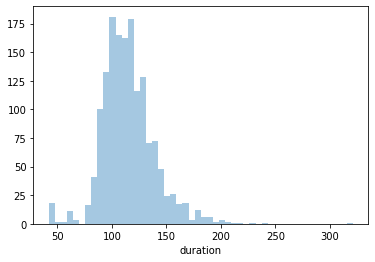

In [33]:
sns.distplot(df_details.duration.astype('timedelta64[m]'), norm_hist=False, kde=False)

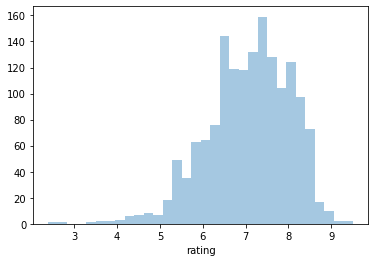

In [34]:
sns.distplot(df_details.rating, norm_hist=False, kde=False)

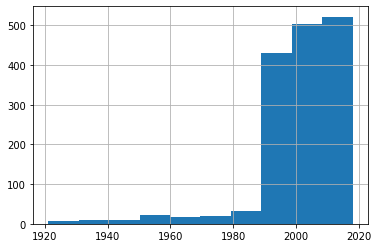

In [44]:
# sns.distplot(df_details.release_date, norm_hist=False, kde=False)
df_details.release_date.hist()

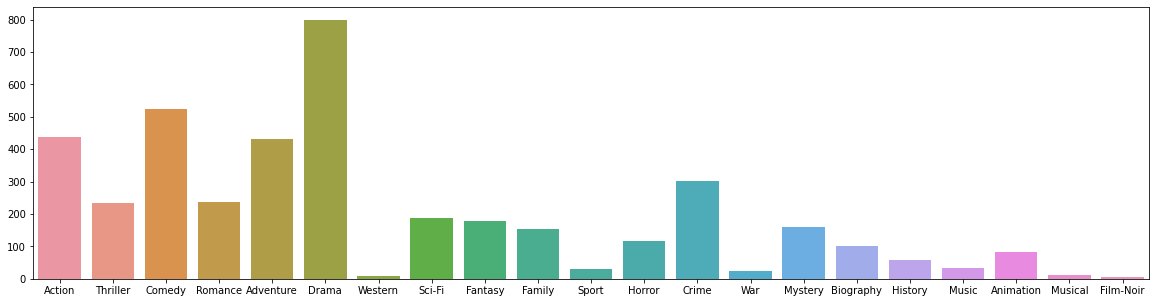

In [65]:
plt.figure(figsize=(20,5))
c = Counter()
df_details.genre.apply(lambda genre_list: c.update(genre_list))
sns.barplot(x="genre", y="Number of Movies", data={"genre": list(c.keys()), "Number of Movies":list(c.values())})

#### Text lengths

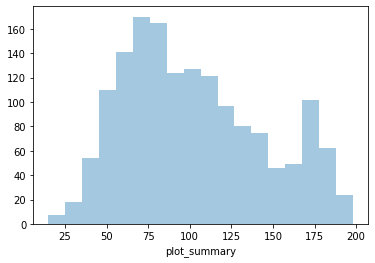

In [73]:
sns.distplot(df_details.plot_summary.apply(lambda t: len(t.split())), norm_hist=False, kde=False)

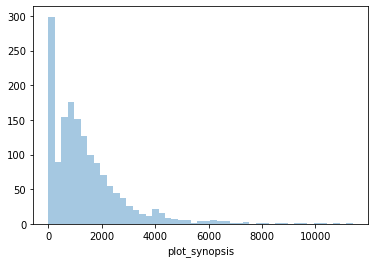

In [74]:
sns.distplot(df_details.plot_synopsis.apply(lambda t: len(t.split())), norm_hist=False, kde=False)